Now we'll dive int othe visuals and see what we can learn

# Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sklearn
from sklearn.cluster import KMeans
import pylab as pl

In [2]:
# setting the path to follow
path=r'C:\Users\evras\Desktop\Projects\Project A6'

In [3]:
#now the dataframe
df_bnb=pd.read_pickle(os.path.join(path,'01 Data','02 Altered','us_airbnb_3_clusters_rooms.pkl'))

In [4]:
df_bnb.head()

listing_id                                       listing_name host_id  \
0      38585    Charming Victorian home - twin beds + breakfast  165529   
1      80905                                   French Chic Loft  427027   
2     108061  Walk to stores/parks/downtown. Fenced yard/Pet...  320564   
3     155305                 Cottage! BonPaul + Sharky's Hostel  746673   
4     160594                                Historic Grove Park  769252   

   latitude  longitude        room_type  price  minimum_nights  \
0  35.65146  -82.62792     Private room     60               1   
1  35.59779  -82.55540  Entire home/apt    470               1   
2  35.60670  -82.55563  Entire home/apt     75              30   
3  35.57864  -82.59578  Entire home/apt     90               1   
4  35.61442  -82.54127     Private room    125              30   

   number_of_reviews  reviews_per_month  host_listing_count  availability_365  \
0                138               1.14                   1                 0   
1                114               1.03                  11               288   
2                 89               0.81                   2               298   
3                267               2.39                   5                 0   
4                 58               0.52                   1                 0   

            state  clusters  room_tag  
0  North Carolina         1         1  
1  North Carolina         4         0  
2  North Carolina         0         0  
3  North Carolina         1         0  
4  North Carolina         1         1

# Data Diving

In [5]:
# I'm going to go ahead and do the aggrogation thing to take a look at the frame in a differnt light.
df_bnb.groupby('clusters').agg({'price':['mean','median'],
                                'minimum_nights':['mean','median'],
                                'host_listing_count':['mean','median'],
                                'availability_365':['mean','median']})

price        minimum_nights        host_listing_count         \
                 mean median           mean median               mean median   
clusters                                                                       
0          131.057984    120      12.802270      3          27.932227      3   
1          114.558510    100       8.714007      2           8.337330      1   
2         1030.469014    999       7.558547      3          20.031862      2   
3         2195.694158   2000      10.693471      3          14.139519      2   
4          428.278503    400       7.329859      3          21.831450      2   

         availability_365         
                     mean median  
clusters                          
0              316.531806    336  
1               53.638050     21  
2              194.732356    214  
3              184.413058    180  
4              178.081031    178

In [6]:
#first let's set up a general size for the upcoming plots
plt.rcParams['figure.figsize']=[10,10]
plt.rcParams['figure.autolayout']=True

In [7]:
# uncomment the next line to ad interactivity (so fancy) just bear in mind it's rough on ram
#%matplotlib notebook

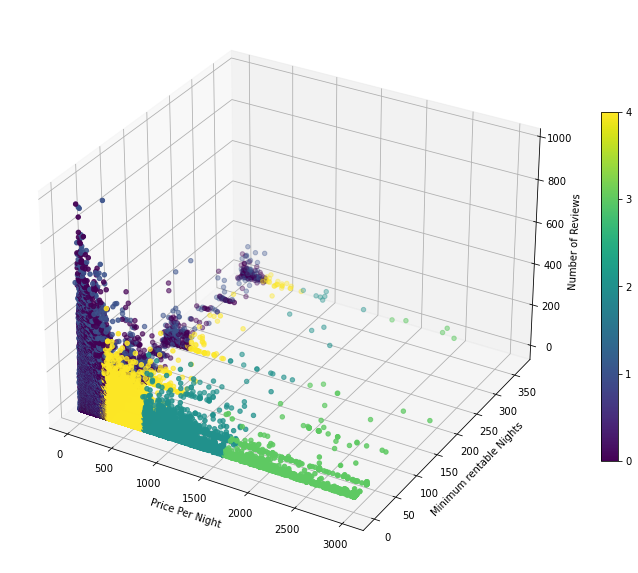

In [8]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb['price'],df_bnb['minimum_nights'],df_bnb['number_of_reviews'],c=df_bnb['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

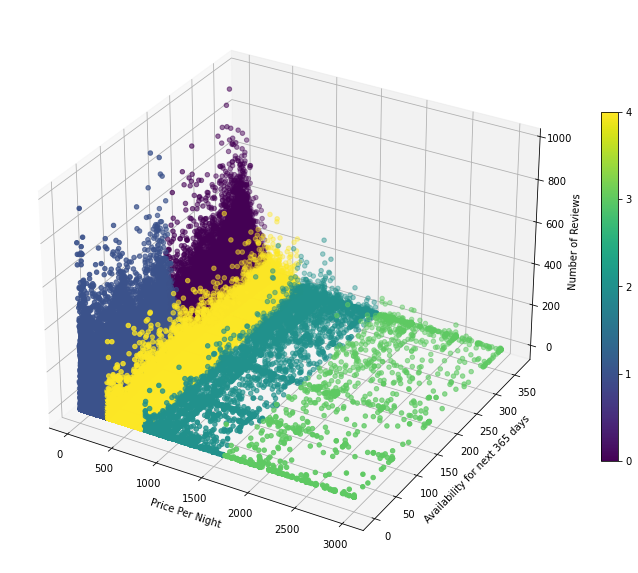

In [9]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb['price'],df_bnb['availability_365'],df_bnb['number_of_reviews'],c=df_bnb['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Availability for next 365 days')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

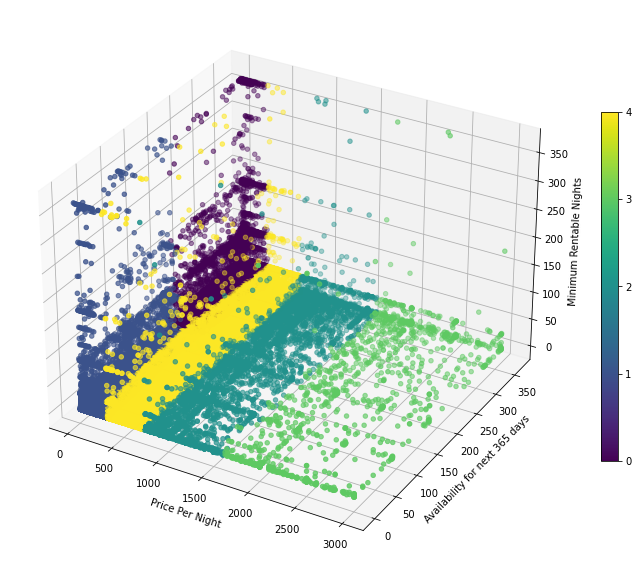

In [68]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb['price'],df_bnb['availability_365'],df_bnb['minimum_nights'],c=df_bnb['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Availability for next 365 days')
ax.set_zlabel('Minimum Rentable Nights')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

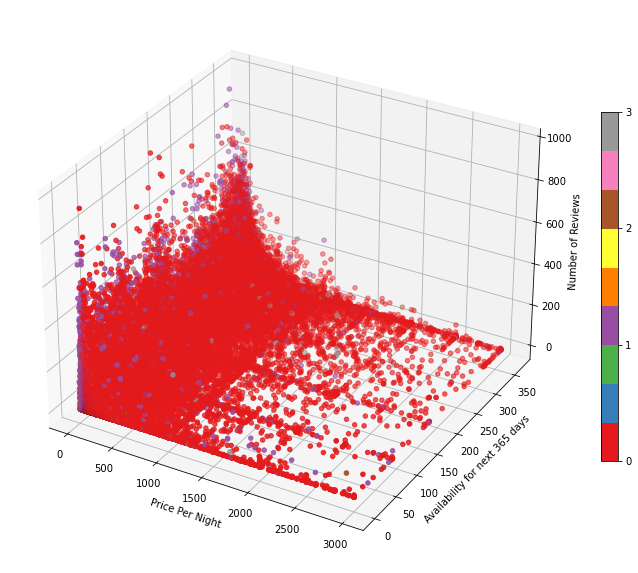

In [10]:
# Ok, so the clearest seperation comes from comparing price, availability, and number of reviews (which is sort of stand in for rentals)
# let's see if room type has any clear connections here
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb['price'],df_bnb['availability_365'],df_bnb['number_of_reviews'],c=df_bnb['room_tag'],cmap=my_cmap)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Availability for next 365 days')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

In [11]:
# I'm going to go with mostly not. Given how mixed up it looks. Though obviously full home/apartment rentals reign over all.

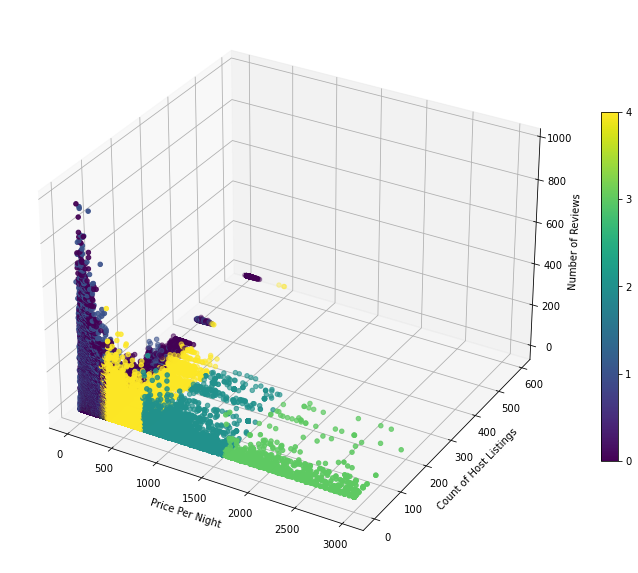

In [12]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb['price'],df_bnb['host_listing_count'],df_bnb['number_of_reviews'],c=df_bnb['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Count of Host Listings')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])

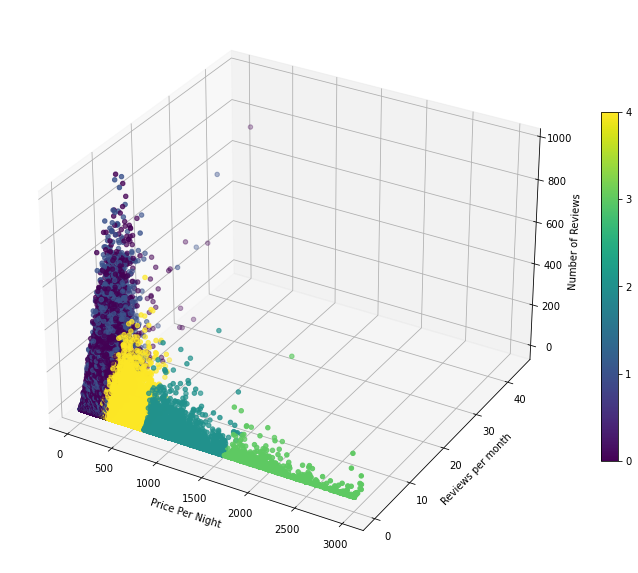

In [13]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Set1')
sc=ax.scatter(df_bnb['price'],df_bnb['reviews_per_month'],df_bnb['number_of_reviews'],c=df_bnb['clusters'])
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Reviews per month')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3,4])
#ax.view_init(45,360)

Something that I think is interesting here is the that two clusters occupy almost the exact same space, where as the others all seem to exist in thier own thresholds largely defined by price. While I would expect price to be the deliniating facrot between all of them, it might be something else. The most impactful other piece of data I have asside from location is that of room type. So the next step will be to seperate the clusters into their own frames, then use the room type as a means of color coding the data points. This will let us see if _that_ had a meaningful impact on the groupings. Which should in turn tells us something about the data.

In [14]:
#In order to color things by room count I need to assign a numerical tag to them.
df_bnb['room_type'].value_counts()

Entire home/apt    153304
Private room        65753
Shared room          4020
Hotel room           1889
Name: room_type, dtype: int64

In [15]:
# Entire home/apt will be 0
df_bnb.loc[df_bnb['room_type']=='Entire home/apt', 'room_tag']=0
# Private room will be 1
df_bnb.loc[df_bnb['room_type']=='Private room', 'room_tag']=1
#Shared room is 2
df_bnb.loc[df_bnb['room_type']=='Shared room', 'room_tag']=2
# Hotel room is 3
df_bnb.loc[df_bnb['room_type']=='Hotel room', 'room_tag']=3

In [16]:
#now we just compare values
df_bnb['room_tag'].value_counts()

0    153304
1     65753
2      4020
3      1889
Name: room_tag, dtype: int64

In [17]:
#looks good there, now we can use it in the color scheme

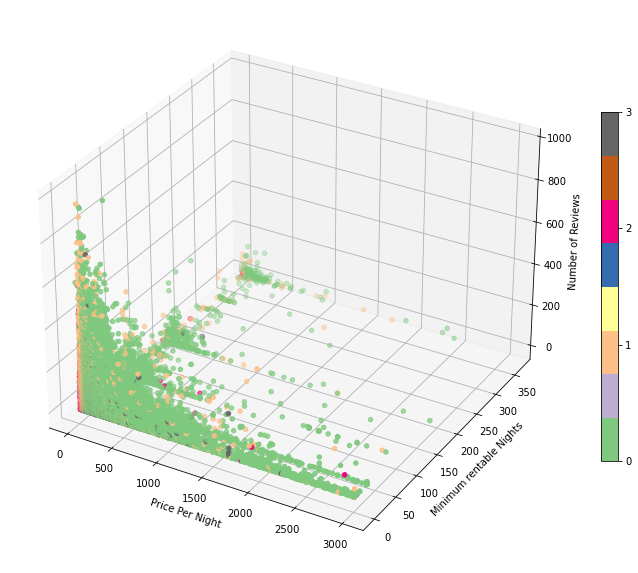

In [18]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb['price'],df_bnb['minimum_nights'],df_bnb['number_of_reviews'],c=df_bnb['room_tag'],cmap=my_cmap)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])

In [19]:
# Now that we have that sorted out, I'll break the df into it's clusters and we'll look at things from there
# First I'll do a count so I can compare them once we're done.
df_bnb['clusters'].value_counts().sort_index(ascending=True)

0     74986
1    118356
2      6277
3      1455
4     23892
Name: clusters, dtype: int64

In [20]:
df_bnb_c0=df_bnb.query('clusters==0')
df_bnb_c1=df_bnb.query('clusters==1')
df_bnb_c2=df_bnb.query('clusters==2')
df_bnb_c3=df_bnb.query('clusters==3')
df_bnb_c4=df_bnb.query('clusters==4')

## Number Crunching

Basically this section will be me looking into some summary information on the various columns to give me an overview of what I'm looking at before we dive into the actual charts. I can look over this and see if I notice any trends or commonalities which will give me a good outline of what to keep an eye out for with the charts.

### cluster 0

In [21]:
df_bnb_c0['clusters'].value_counts()

0    74986
Name: clusters, dtype: int64

In [22]:
df_bnb_c0['room_type'].value_counts()

Entire home/apt    52175
Private room       20339
Shared room         1742
Hotel room           730
Name: room_type, dtype: int64

In [23]:
df_bnb_c0[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','host_listing_count']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  74986.000000    74986.000000       74986.000000       74986.000000   
mean     131.057984       12.802270          41.455592           1.211799   
std       69.685801       25.196715          71.820927           1.654037   
min       10.000000        1.000000           0.000000           0.000000   
25%       76.000000        1.000000           1.000000           0.080000   
50%      120.000000        3.000000          11.000000           0.550000   
75%      175.000000       30.000000          50.000000           1.770000   
max      350.000000      365.000000         966.000000          44.060000   

       availability_365  host_listing_count  
count      74986.000000        74986.000000  
mean         316.531806           27.932227  
std           51.068089           72.983628  
min          156.000000            1.000000  
25%          280.000000            1.000000  
50%          336.000000            3.000000  
75%          361.000000           15.000000  
max          365.000000          593.000000

### cluster 1

In [24]:
df_bnb_c1['clusters'].value_counts()

1    118356
Name: clusters, dtype: int64

In [25]:
df_bnb_c1['room_type'].value_counts()

Entire home/apt    72344
Private room       43154
Shared room         2169
Hotel room           689
Name: room_type, dtype: int64

In [26]:
df_bnb_c1[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','host_listing_count']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  118356.000000   118356.000000      118356.000000      118356.000000   
mean      114.558510        8.714007          35.263814           1.210764   
std        63.191549       18.382284          63.589445           1.669114   
min        10.000000        1.000000           0.000000           0.000000   
25%        65.000000        1.000000           1.000000           0.060000   
50%       100.000000        2.000000           8.000000           0.470000   
75%       150.000000        5.000000          40.000000           1.800000   
max       332.000000      365.000000         953.000000          33.620000   

       availability_365  host_listing_count  
count     118356.000000       118356.000000  
mean          53.638050            8.337330  
std           62.761889           28.825152  
min            0.000000            1.000000  
25%            0.000000            1.000000  
50%           21.000000            1.000000  
75%           90.000000            3.000000  
max          193.000000          593.000000

### cluster 2

In [27]:
df_bnb_c2['clusters'].value_counts()

2    6277
Name: clusters, dtype: int64

In [28]:
df_bnb_c2['room_type'].value_counts()

Entire home/apt    5701
Private room        488
Hotel room           57
Shared room          31
Name: room_type, dtype: int64

In [29]:
df_bnb_c2[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','host_listing_count']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  6277.000000     6277.000000        6277.000000        6277.000000   
mean   1030.469014        7.558547           9.672774           0.380027   
std     235.386229       19.564245          24.089162           0.774286   
min     725.000000        1.000000           0.000000           0.000000   
25%     848.000000        2.000000           0.000000           0.000000   
50%     999.000000        3.000000           1.000000           0.030000   
75%    1191.000000        5.000000           7.000000           0.410000   
max    1614.000000      365.000000         361.000000          13.810000   

       availability_365  host_listing_count  
count       6277.000000         6277.000000  
mean         194.732356           20.031862  
std          144.710000           43.770397  
min            0.000000            1.000000  
25%           27.000000            1.000000  
50%          214.000000            2.000000  
75%          344.000000           12.000000  
max          365.000000          260.000000

### Cluster 3

In [30]:
df_bnb_c3['clusters'].value_counts()

3    1455
Name: clusters, dtype: int64

In [31]:
df_bnb_c3['room_type'].value_counts()

Entire home/apt    1375
Private room         64
Hotel room            9
Shared room           7
Name: room_type, dtype: int64

In [32]:
df_bnb_c3[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','host_listing_count']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  1455.000000     1455.000000        1455.000000        1455.000000   
mean   2195.694158       10.693471           4.326460           0.222948   
std     404.542484       28.860921          14.517786           0.724245   
min    1616.000000        1.000000           0.000000           0.000000   
25%    1895.000000        2.000000           0.000000           0.000000   
50%    2000.000000        3.000000           0.000000           0.000000   
75%    2500.000000        5.000000           2.000000           0.100000   
max    3000.000000      365.000000         206.000000          17.260000   

       availability_365  host_listing_count  
count       1455.000000         1455.000000  
mean         184.413058           14.139519  
std          147.452673           33.051632  
min            0.000000            1.000000  
25%            0.000000            1.000000  
50%          180.000000            2.000000  
75%          348.500000           10.000000  
max          365.000000          233.000000

### cluster 4

In [33]:
df_bnb_c4['clusters'].value_counts()

4    23892
Name: clusters, dtype: int64

In [34]:
df_bnb_c4['room_type'].value_counts()

Entire home/apt    21709
Private room        1708
Hotel room           404
Shared room           71
Name: room_type, dtype: int64

In [35]:
df_bnb_c4[['price','minimum_nights','number_of_reviews','reviews_per_month','availability_365','host_listing_count']].describe()

price  minimum_nights  number_of_reviews  reviews_per_month  \
count  23892.000000    23892.000000       23892.000000       23892.000000   
mean     428.278503        7.329859          18.524820           0.696325   
std      113.289423       18.595847          34.627544           1.106120   
min      245.000000        1.000000           0.000000           0.000000   
25%      346.000000        2.000000           0.000000           0.000000   
50%      400.000000        3.000000           4.000000           0.220000   
75%      500.000000        5.000000          21.000000           0.960000   
max      734.000000      365.000000         524.000000          16.360000   

       availability_365  host_listing_count  
count      23892.000000        23892.000000  
mean         178.081031           21.831450  
std          129.470382           49.266059  
min            0.000000            1.000000  
25%           59.000000            1.000000  
50%          178.000000            2.000000  
75%          304.000000           14.000000  
max          365.000000          593.000000

## Cluster 0

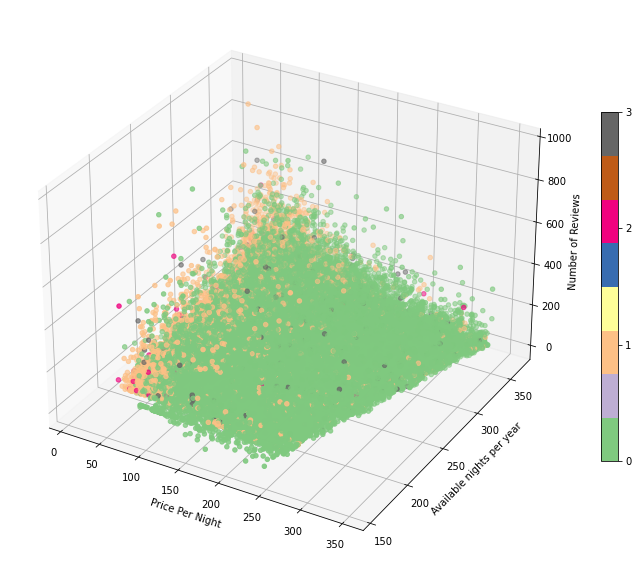

In [66]:
#fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c0['price'],df_bnb_c0['availability_365'],df_bnb_c0['number_of_reviews'],c=df_bnb_c0['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Available nights per year')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)
# I'm going to be including that last line commented out in each set because it will rotate to a side view.
# I could just enable the interactive mode but it seems to be a little sluggish so it's just easier for me to do it this way.

In [37]:
#I'm going to cut this one down so that we can get a better look at the the under 60 nights range
df_bnb_c0_shortmin=df_bnb_c0.query('minimum_nights<=60')

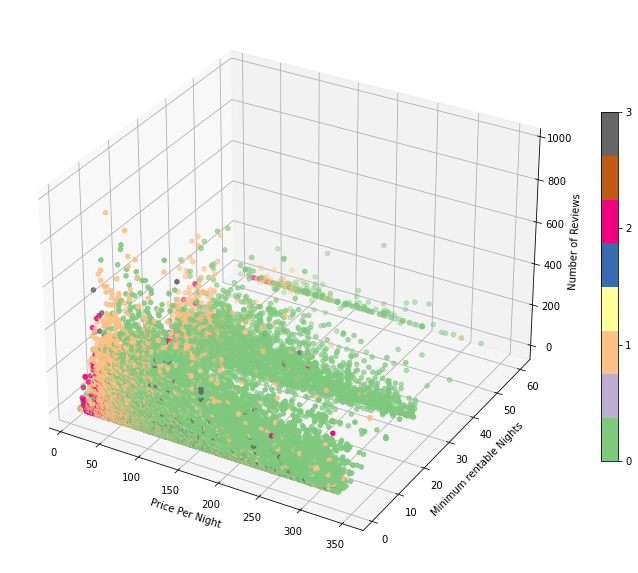

In [38]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c0_shortmin['price'],df_bnb_c0_shortmin['minimum_nights'],df_bnb_c0_shortmin['number_of_reviews'],c=df_bnb_c0_shortmin['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [39]:
#one more slice
df_bnb_c0_tiny=df_bnb_c0.query('minimum_nights<=20 and price <=100')

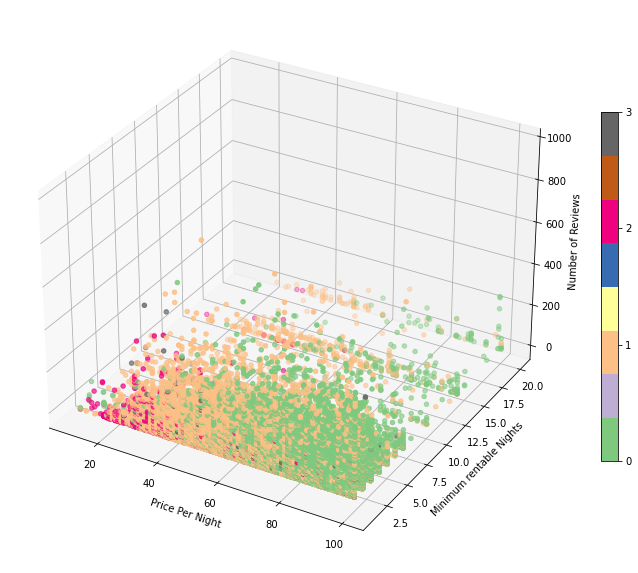

In [40]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c0_tiny['price'],df_bnb_c0_tiny['minimum_nights'],df_bnb_c0_tiny['number_of_reviews'],c=df_bnb_c0_tiny['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [41]:
df_bnb_c0_tiny['room_type'].value_counts(ascending=True)

Hotel room           195
Shared room          952
Entire home/apt     8702
Private room       11772
Name: room_type, dtype: int64

## Cluster 1

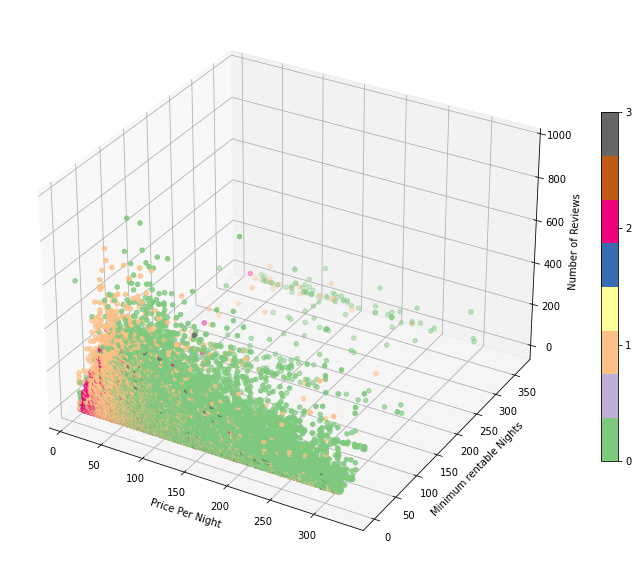

In [42]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c1['price'],df_bnb_c1['minimum_nights'],df_bnb_c1['number_of_reviews'],c=df_bnb_c1['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [43]:
#I'm going to go ahead and slice down to 60day in this too, given how little data exists beyond that point in this cluster
df_bnb_c1_shortmin=df_bnb_c1.query('minimum_nights<=60')

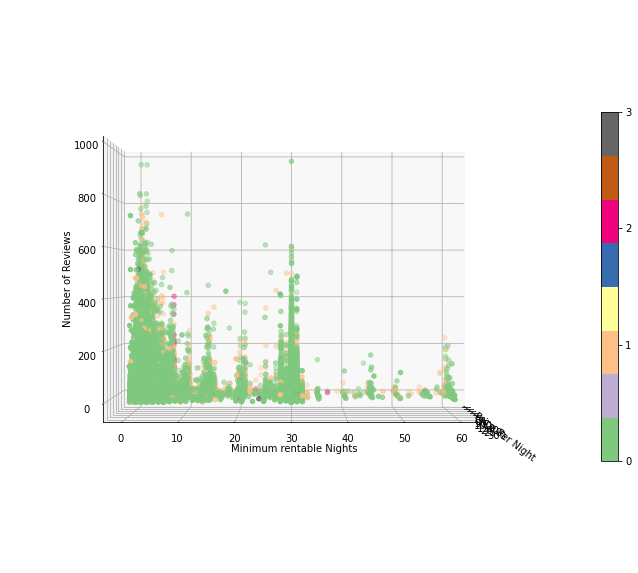

In [44]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c1_shortmin['price'],df_bnb_c1_shortmin['minimum_nights'],df_bnb_c1_shortmin['number_of_reviews'],c=df_bnb_c1_shortmin['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
ax.view_init(0,0)

In [45]:
df_bnb_c1_tiny=df_bnb_c1.query('minimum_nights<=20 and price <=2400')

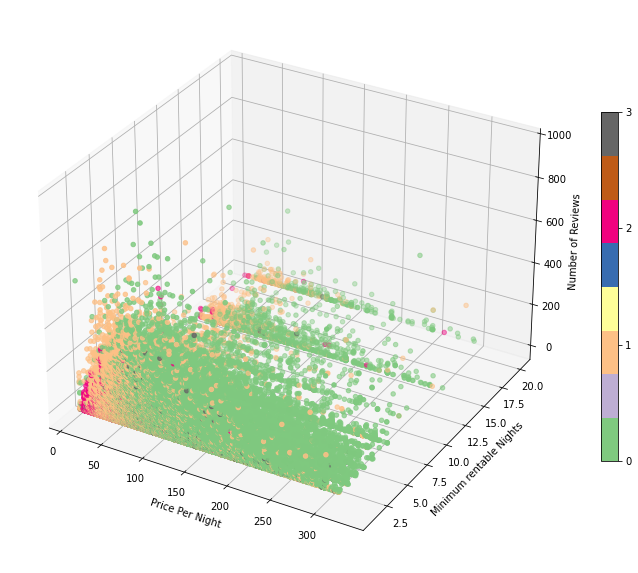

In [46]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c1_tiny['price'],df_bnb_c1_tiny['minimum_nights'],df_bnb_c1_tiny['number_of_reviews'],c=df_bnb_c1_tiny['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

## Cluster 2

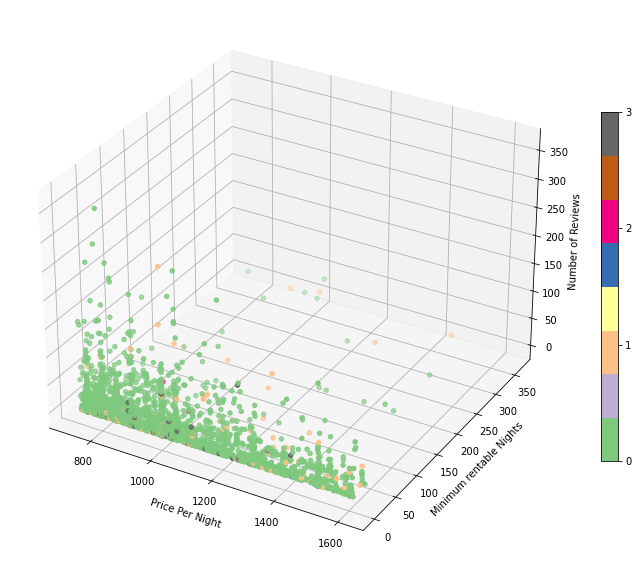

In [47]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c2['price'],df_bnb_c2['minimum_nights'],df_bnb_c2['number_of_reviews'],c=df_bnb_c2['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [48]:
df_bnb_c2_shortmin=df_bnb_c2.query('minimum_nights<=60')

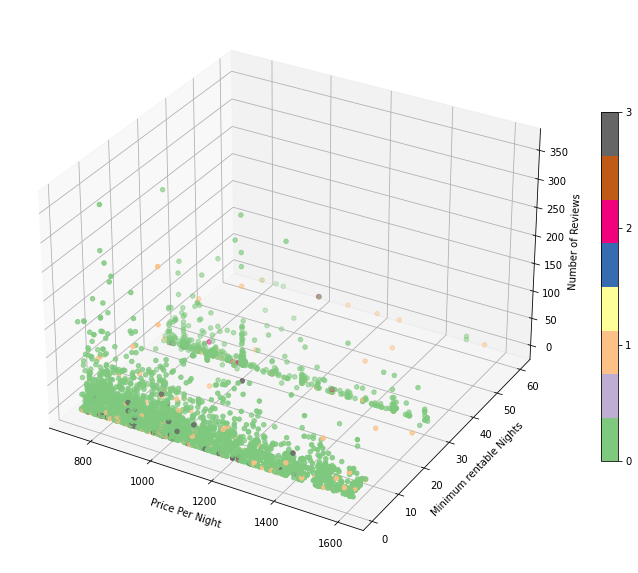

In [49]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c2_shortmin['price'],df_bnb_c2_shortmin['minimum_nights'],df_bnb_c2_shortmin['number_of_reviews'],c=df_bnb_c2_shortmin['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [50]:
df_bnb_c2_tiny=df_bnb_c2.query('minimum_nights<=20 and price <=1200')

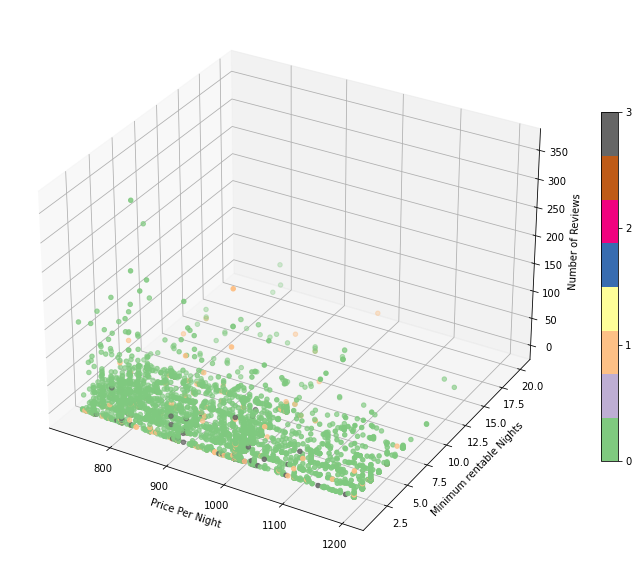

In [51]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c2_tiny['price'],df_bnb_c2_tiny['minimum_nights'],df_bnb_c2_tiny['number_of_reviews'],c=df_bnb_c2_tiny['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

## Cluster 3

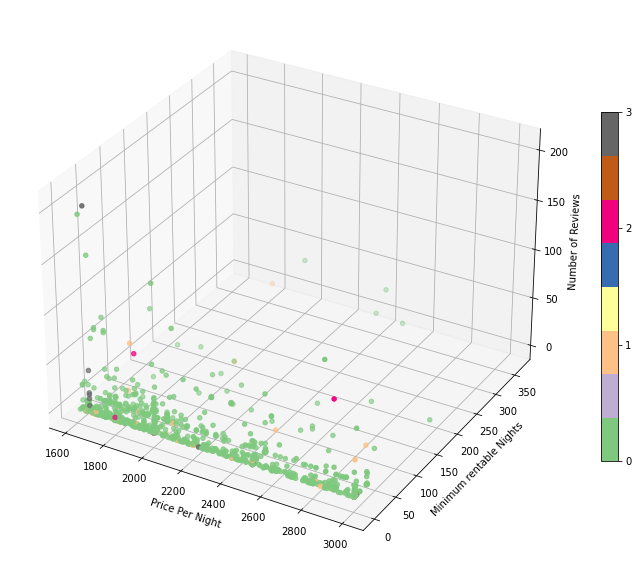

In [52]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c3['price'],df_bnb_c3['minimum_nights'],df_bnb_c3['number_of_reviews'],c=df_bnb_c3['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [53]:
df_bnb_c3_shortmin=df_bnb_c3.query('minimum_nights<=60')

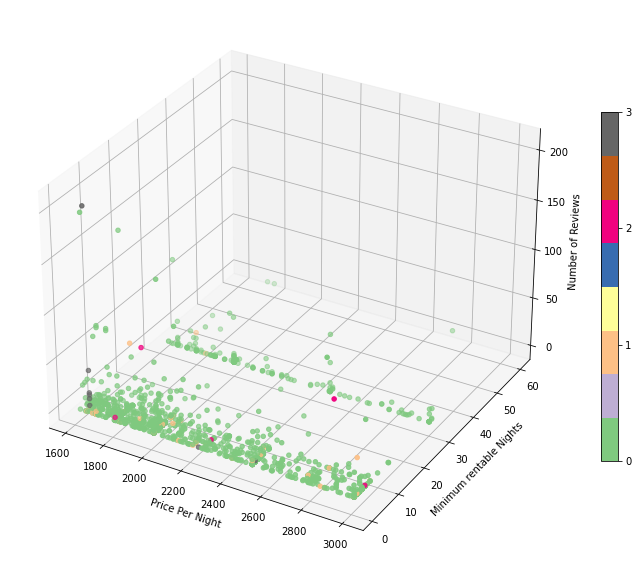

In [54]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c3_shortmin['price'],df_bnb_c3_shortmin['minimum_nights'],df_bnb_c3_shortmin['number_of_reviews'],c=df_bnb_c3_shortmin['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [55]:
df_bnb_c3_tiny=df_bnb_c3.query('minimum_nights<=20 and price <=2400')

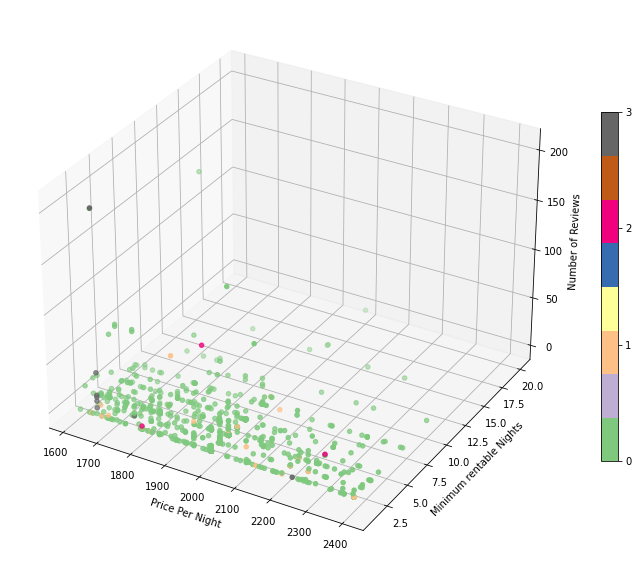

In [56]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c3_tiny['price'],df_bnb_c3_tiny['minimum_nights'],df_bnb_c3_tiny['number_of_reviews'],c=df_bnb_c3_tiny['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

## Cluster 4

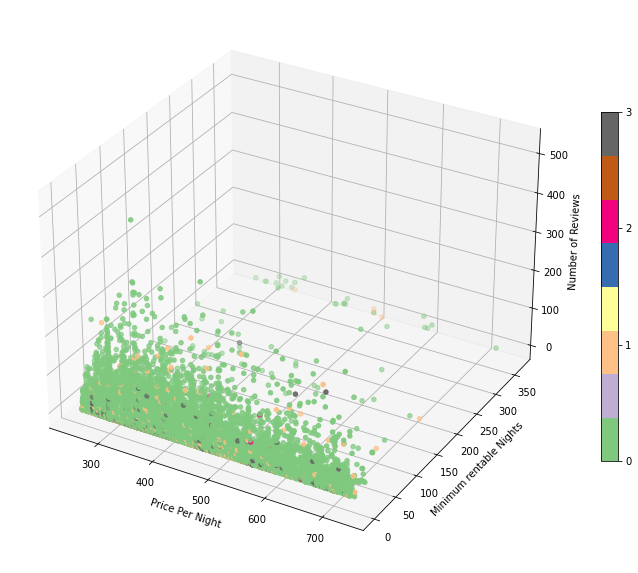

In [57]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c4['price'],df_bnb_c4['minimum_nights'],df_bnb_c4['number_of_reviews'],c=df_bnb_c4['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [58]:
df_bnb_c4_shortmin=df_bnb_c4.query('minimum_nights<=60')

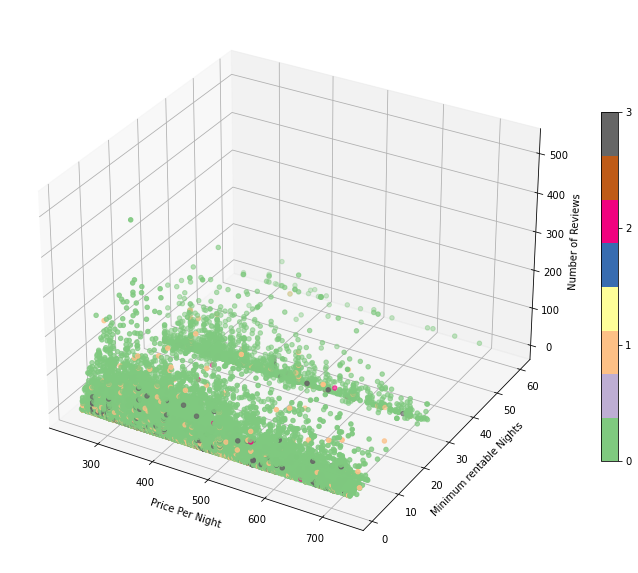

In [59]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c4_shortmin['price'],df_bnb_c4_shortmin['minimum_nights'],df_bnb_c4_shortmin['number_of_reviews'],c=df_bnb_c4_shortmin['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)

In [60]:
df_bnb_c4_tiny=df_bnb_c4.query('minimum_nights<=20 and price <=2400')

In [61]:
df_bnb_c4_tiny.head()

listing_id                                       listing_name  host_id  \
1       80905                                   French Chic Loft   427027   
26     723410  Asheville Mountain Vista 3mi to Downtown Ashev...  3736218   
39     990426                                  Vibe of Asheville   427027   
46    1223655                        Handsome Chic Loft Downtown   427027   
62    1684109                10 Minutes to Downtown  Epic Views!  4117051   

    latitude  longitude        room_type  price  minimum_nights  \
1   35.59779  -82.55540  Entire home/apt    470               1   
26  35.62894  -82.51751  Entire home/apt    305               3   
39  35.59789  -82.55547  Entire home/apt    330               1   
46  35.59771  -82.55533  Entire home/apt    514               1   
62  35.60792  -82.48789  Entire home/apt    325               3   

    number_of_reviews  reviews_per_month  host_listing_count  \
1                 114               1.03                  11   
26                 28               0.31                   7   
39                 69               0.79                  11   
46                 70               0.80                  11   
62                115               1.36                   2   

    availability_365           state  clusters  room_tag  
1                288  North Carolina         4         0  
26               271  North Carolina         4         0  
39               326  North Carolina         4         0  
46                 1  North Carolina         4         0  
62               288  North Carolina         4         0

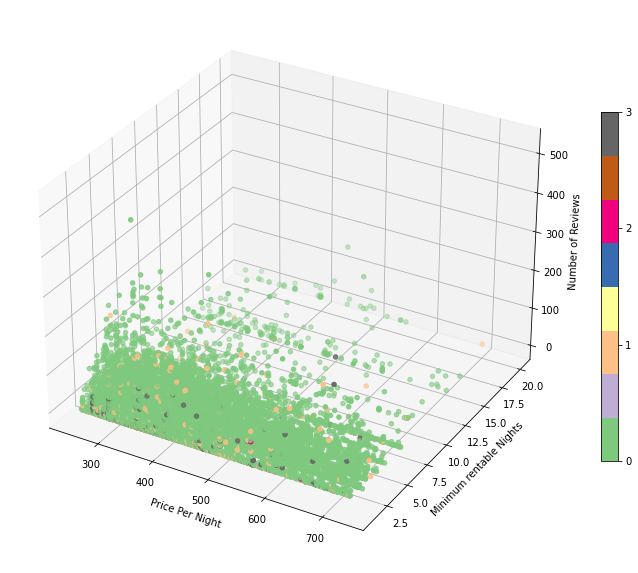

In [62]:
fig=plt.figure()
ax=plt.axes(projection='3d')
my_cmap=plt.get_cmap('Accent')
sc=ax.scatter(df_bnb_c4_tiny['price'],df_bnb_c4_tiny['minimum_nights'],df_bnb_c4_tiny['number_of_reviews'],c=df_bnb_c4_tiny['room_tag'],cmap=my_cmap,)
ax.set_xlabel('Price Per Night')
ax.set_ylabel('Minimum rentable Nights')
ax.set_zlabel('Number of Reviews')
fig.colorbar(sc,ax=ax, shrink=0.5, spacing='uniform',ticks=[0,1,2,3])
#ax.view_init(0,0)